 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [137]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [138]:
# Reading whale returns
whalereturnspath = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')
whale_returns_dataframe= pd.read_csv(whalereturnspath, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [139]:
# Count nulls
whale_returns_dataframe.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [140]:
# Drop nulls
whale_returns_dataframe=whale_returns_dataframe.dropna()

# Confrm null values have been dropped
whale_returns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [141]:
# Reading algorithmic returns
algoreturnspath = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv')
algo_dataframe= pd.read_csv(algoreturnspath, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [142]:
# Count nulls
algo_dataframe.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [143]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna()

# Confirm null values have been dropped
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [144]:
# Reading S&P 500 Closing Prices
sp500path = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
sp500_dataframe= pd.read_csv(sp500path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_dataframe.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [145]:
# Check Data Types
sp500_dataframe.dtypes


Close    object
dtype: object

In [146]:
# Check Data Types
sp500_dataframe['Close'].dtype
sp500_dataframe.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [147]:
# fix Data types
sp500_dataframe['Close'].dtype
sp500_dataframe['Close'] = sp500_dataframe['Close'].str.replace('$', '')
sp500_dataframe.head()

C:\Users\rache\AppData\Local\Temp\ipykernel_3808\1153034883.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_dataframe['Close'] = sp500_dataframe['Close'].str.replace('$', '')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [148]:
# confirm Close data type
sp500_dataframe['Close'].dtype

dtype('O')

In [149]:
# Cast Close series as float
sp500_dataframe['Close'] = sp500_dataframe['Close'].astype('float')
sp500_dataframe['Close'].dtype

dtype('float64')

In [150]:
# Calculate daily returns
sp500_daily_returns = sp500_dataframe.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [151]:
# Drop nulls
sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [152]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close':'sp500 close'}, inplace=True)
sp500_daily_returns.head()

,sp500 close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [153]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# whale_returns_dataframe
# algo_dataframe
# sp500_daily_returns.head()
joined_data_columns = pd.concat([whale_returns_dataframe, algo_dataframe, sp500_daily_returns], axis='columns', join='outer')
joined_data_columns.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 close
Date,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,0.003469
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,0.009990
2012-10-09,NaN,NaN,NaN,NaN,NaN,NaN,0.006227
2012-10-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.000195
2012-10-11,NaN,NaN,NaN,NaN,NaN,NaN,0.002975


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

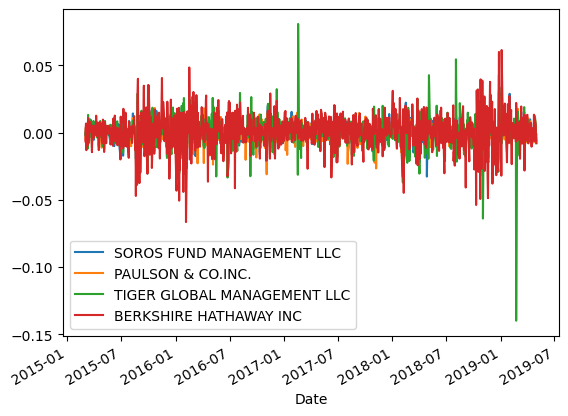

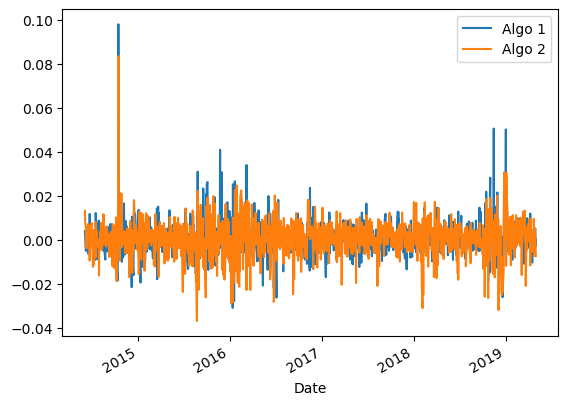

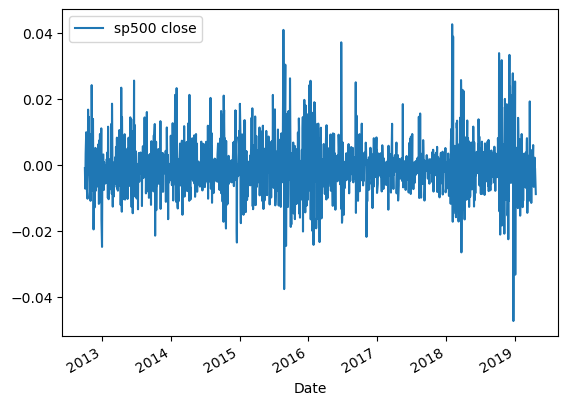

In [154]:
# Plot daily returns of all portfolios
whale_returns_dataframe.plot()
algo_dataframe.plot()
sp500_daily_returns.plot()

#### Calculate and Plot cumulative returns.

In [155]:
# Calculate cumulative returns of all portfolios
algo_dataframe = Algo 1.cumprod()
# Plot cumulative returns


SyntaxError: invalid decimal literal (3665863797.py, line 2)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<Axes: >

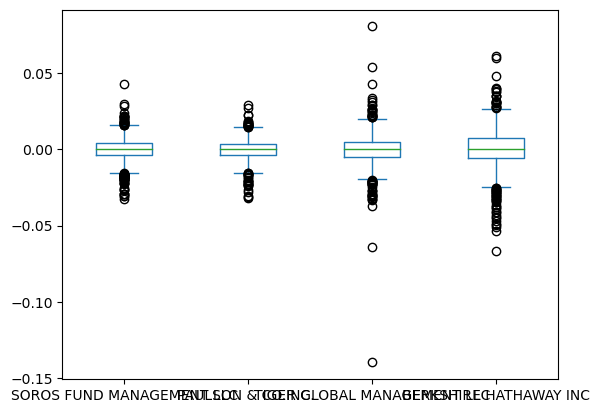

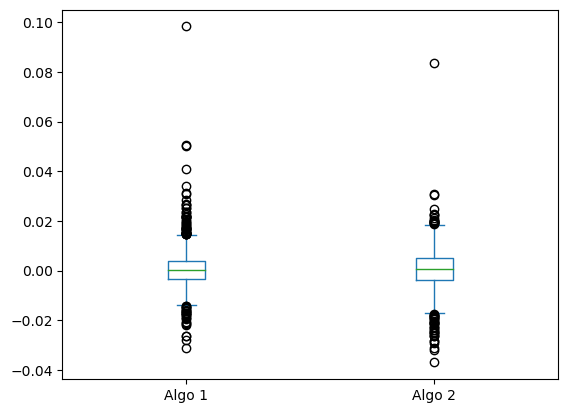

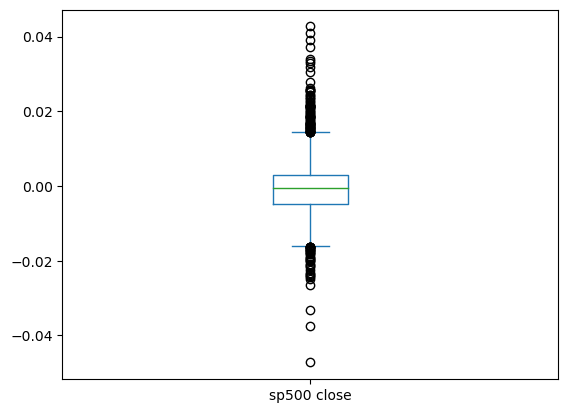

In [156]:
# Box plot to visually show risk
whale_returns_dataframe.plot.box()
algo_dataframe.plot.box()
sp500_daily_returns.plot.box()

### Create a box plot for each portfolio


### Calculate Standard Deviations

In [157]:
# Calculate the daily standard deviations of all portfolios
joined_data_std = joined_data_columns.std()
joined_data_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
sp500 close                    0.008135
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [158]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std.head()
# Determine which portfolios are riskier than the S&P 500
joined_data_std = joined_data_std.sort_values(ascending=False)
joined_data_std.head(10)
# Algo 2(0.008466), Tiger Global Management LLC (0.010824) and Berkshire Hathaway Inc (0.012831)
# are riskier than sp500 since they have a larger std compared to the overall average

BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
Algo 2                         0.008466
sp500 close                    0.008135
Algo 1                         0.007988
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64

### Calculate the Annualized Standard Deviation

In [159]:
# Calculate the annualized standard deviation (252 trading days)
joined_data_std = joined_data_columns.std()
annualized_std = joined_data_std * np.sqrt(252)
annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
sp500 close                    0.129133
dtype: float64

<Axes: >

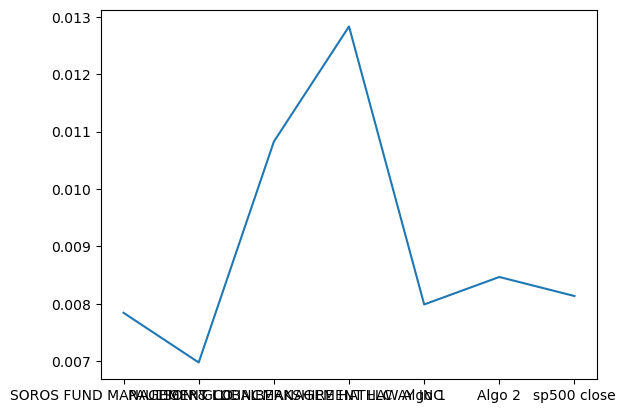

In [168]:
joined_data_std = joined_data_columns.std()
joined_data_std.plot()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: >

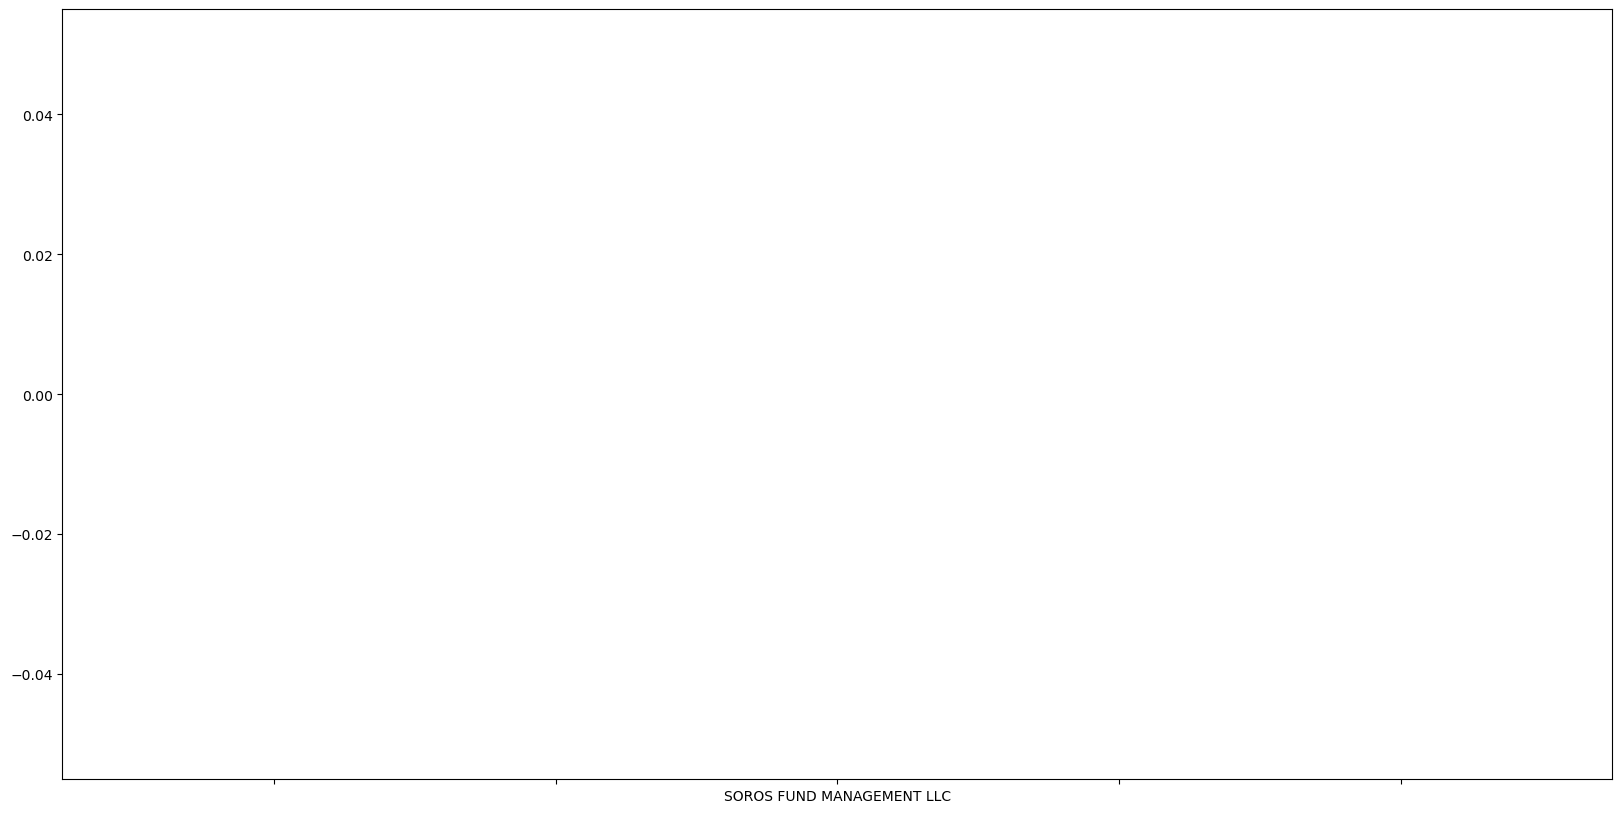

In [160]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data_std.rolling(window=21).std().plot(figsize=(20,10))
                        
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [443]:
# Calculate the correlation
correlation = joined_data_columns.corr()
correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 close
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.000574
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,-0.001505
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,-0.013856
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.346568,-0.048003
Algo 2,0.826719,0.677993,0.508139,0.687717,0.346568,1.000000,-0.011537
sp500 close,0.000574,0.013549,-0.001505,-0.013856,-0.048003,-0.011537,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [464]:
# Calculate covariance of a single portfolio
covariance = whale_returns_dataframe.cov()
covariance

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,0.000061,0.000038,0.000048,0.000076
PAULSON & CO.INC.,0.000038,0.000049,0.000033,0.000049
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000117,0.000059
BERKSHIRE HATHAWAY INC,0.000076,0.000049,0.000059,0.000165


In [460]:
# Calculate variance of S&P 500
variance = joined_data_columns['sp500 close'].var()
variance

6.617241051948309e-05

<Axes: >

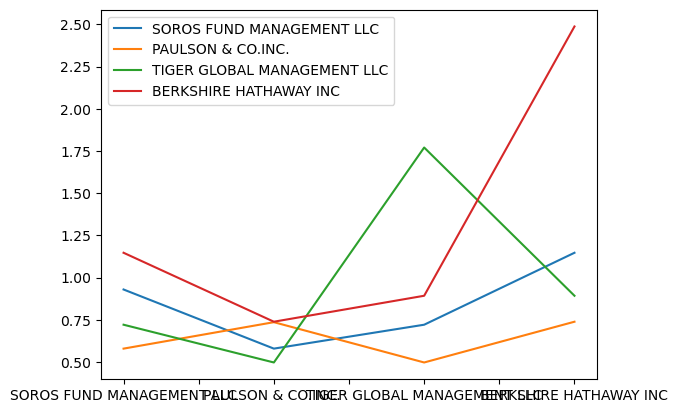

In [465]:
# Computing beta
beta = covariance / variance
beta
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [163]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [171]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data_columns.mean() * 252) / (joined_data_std * np.sqrt(252))
sharpe_ratios                                   

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
sp500 close                   -0.774405
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

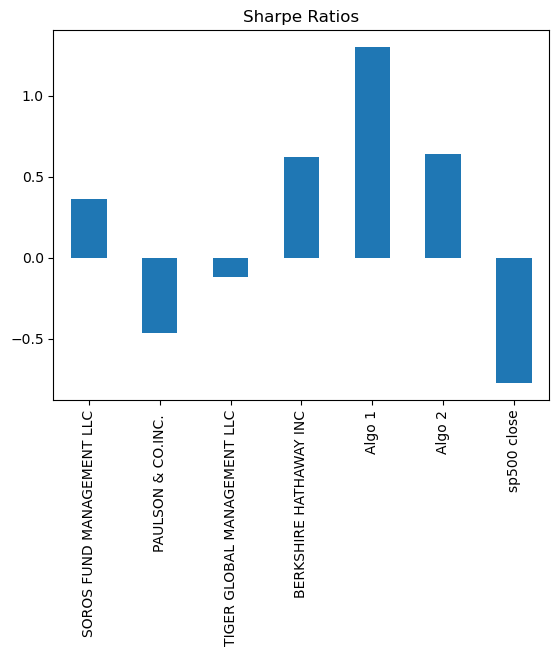

In [172]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# Algo 1 out performs all Whale portfolios but Algo 2 seems to be performing at Par with Berskshire hathaway; it out performs the rest of the whale portfolio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [374]:
# Reading data from 1st stock
teslareturnspath = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/tesla_returns.csv')
tesla_returns_dataframe = pd.read_csv(teslareturnspath, index_col='Date', parse_dates=True, infer_datetime_format=True)
tesla_returns_dataframe.rename(columns={'Close':'TESLA'}, inplace=True)
tesla_returns_dataframe.head()
                                      

,TESLA
Date,
2015-03-02 00:00:00,13.16
2015-03-03 16:00:00,13.30
2015-03-04 16:00:00,13.50
2015-03-05 16:00:00,13.38
2015-03-06 16:00:00,12.93


In [375]:
# Check for null values
tesla_returns_dataframe.isnull().mean()

TESLA    0.0
dtype: float64

In [376]:
# Number of rows
tesla_returns_dataframe.count()

TESLA    1049
dtype: int64

In [378]:
# Reading data from 2nd stock
fordreturnspath = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/ford_returns.csv')
ford_returns_dataframe = pd.read_csv(fordreturnspath, index_col='Date', parse_dates=True, infer_datetime_format=True)
ford_returns_dataframe.rename(columns={'Close':'FORD'}, inplace=True)
ford_returns_dataframe.head()           

,FORD
Date,
2015-03-02 16:00:00,16.57
2015-03-03 16:00:00,16.17
2015-03-04 16:00:00,16.03
2015-03-05 16:00:00,16.11
2015-03-06 16:00:00,15.93


In [379]:
# Check for null values
ford_returns_dataframe.isnull().mean()

FORD    0.0
dtype: float64

In [380]:
# Number of rows
ford_returns_dataframe.count()

FORD    1049
dtype: int64

In [381]:
# Reading data from 3rd stock
gmreturnspath = Path(r'C:/Users/rache/UNCC-VIRT-FIN-PT-05-2023-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/gm_returns.csv')
gm_returns_dataframe = pd.read_csv(gmreturnspath, index_col='Date', parse_dates=True, infer_datetime_format=True)
gm_returns_dataframe.rename(columns={'Close':'GM'}, inplace=True)
gm_returns_dataframe.head()
                                

,GM
Date,
2015-03-02 16:00:00,37.61
2015-03-03 16:00:00,37.80
2015-03-04 16:00:00,37.57
2015-03-05 16:00:00,37.61
2015-03-06 16:00:00,36.84


In [382]:
# Check for null values
gm_returns_dataframe.isnull().mean()

GM    0.0
dtype: float64

In [383]:
# Number of rows
gm_returns_dataframe.count()

GM    1049
dtype: int64

In [384]:
# Combine all stocks in a single DataFrame
joined_stocks_dataframe = pd.concat([tesla_returns_dataframe, ford_returns_dataframe, gm_returns_dataframe], axis='columns', join='inner')
joined_stocks_dataframe.head()

,TESLA,FORD,GM
Date,,,
2015-03-03 16:00:00,13.30,16.17,37.80
2015-03-04 16:00:00,13.50,16.03,37.57
2015-03-05 16:00:00,13.38,16.11,37.61
2015-03-06 16:00:00,12.93,15.93,36.84
2015-03-09 16:00:00,12.73,16.03,37.66


In [385]:
# Reset Date index


In [386]:
# Reorganize portfolio data by having a column per symbol


In [387]:
# Calculate daily returns, Drop NAs, Display sample data
joined_stocks_daily_returns=joined_stocks_dataframe.pct_change().dropna()
joined_stocks_daily_returns.head()

,TESLA,FORD,GM
Date,,,
2015-03-04 16:00:00,0.015038,-0.008658,-0.006085
2015-03-05 16:00:00,-0.008889,0.004991,0.001065
2015-03-06 16:00:00,-0.033632,-0.011173,-0.020473
2015-03-09 16:00:00,-0.015468,0.006277,0.022258
2015-03-10 16:00:00,-0.003142,-0.019339,-0.002921


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [388]:
# Set weights, Calculate portfolio return, Display sample data
weights = [1/3, 1/3, 1/3]
weighted_returns = joined_stocks_daily_returns.dot(weights)
weighted_returns.head()

Date
2015-03-04 16:00:00    0.000098
2015-03-05 16:00:00   -0.000945
2015-03-06 16:00:00   -0.021760
2015-03-09 16:00:00    0.004356
2015-03-10 16:00:00   -0.008467
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [419]:
# Join your returns DataFrame to the original returns DataFrame (named noahs_ark)
noahs_ark = pd.concat([joined_data_columns, joined_stocks_daily_returns], axis='columns', join='outer')
noahs_ark.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 close,TESLA,FORD,GM
Date,,,,,,,,,,
2019-04-29 00:00:00,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,NaN,NaN,NaN,NaN
2019-04-29 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026786,-0.008646,0.008317
2019-04-30 00:00:00,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,NaN,NaN,NaN,NaN
2019-04-30 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011801,0.012597,-0.026493
2019-05-01 00:00:00,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,NaN,NaN,NaN,NaN


In [420]:
# Only compare dates where return data exists for all the stocks 
noahs_ark = noahs_ark.fillna(value = 0)
noahs_ark.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 close,TESLA,FORD,GM
Date,,,,,,,,,,
2012-10-01,0.0,0.0,0.0,0.0,0.0,0.0,-0.000872,0.0,0.0,0.0
2012-10-02,0.0,0.0,0.0,0.0,0.0,0.0,-0.003611,0.0,0.0,0.0
2012-10-03,0.0,0.0,0.0,0.0,0.0,0.0,-0.007123,0.0,0.0,0.0
2012-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.000322,0.0,0.0,0.0
2012-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.003469,0.0,0.0,0.0


In [421]:
# drop NaNs
noahs_ark.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500 close                    0
TESLA                          0
FORD                           0
GM                             0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [424]:
# Calculate the annualized `std`
noahs_ark_std = noahs_ark.std()
noahs_ark_annualized_std = noahs_ark_std * np.sqrt(252)
noahs_ark_annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.077781
PAULSON & CO.INC.              0.069207
TIGER GLOBAL MANAGEMENT LLC    0.107346
BERKSHIRE HATHAWAY INC         0.127301
Algo 1                         0.085705
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

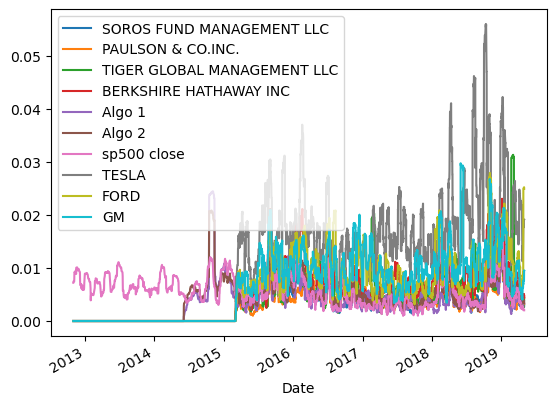

In [452]:
# Calculate rolling standard deviation
noahs_ark_rolling_std = noahs_ark.rolling(window=21).std()
# Plot rolling standard deviation
noahs_ark_rolling_std.plot()

### Calculate and plot the correlation

In [450]:
# Calculate correlation
correlation = noahs_ark.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 close,TESLA,FORD,GM
SOROS FUND MANAGEMENT LLC,1.000000,0.699485,0.561543,0.754380,0.282223,0.749110,0.000430,-0.000177,0.000167,-0.000087
PAULSON & CO.INC.,0.699485,1.000000,0.435345,0.544715,0.234389,0.613763,0.011505,0.000227,-0.000214,0.000112
TIGER GLOBAL MANAGEMENT LLC,0.561543,0.435345,1.000000,0.424720,0.143969,0.460270,-0.001213,0.000058,-0.000055,0.000029
BERKSHIRE HATHAWAY INC,0.754380,0.544715,0.424720,1.000000,0.257401,0.623181,-0.011722,-0.000304,0.000287,-0.000150
Algo 1,0.282223,0.234389,0.143969,0.257401,1.000000,0.347577,-0.043343,-0.000688,0.000648,-0.000338
Algo 2,0.749110,0.613763,0.460270,0.623181,0.347577,1.000000,-0.010556,-0.000339,0.000319,-0.000167
sp500 close,0.000430,0.011505,-0.001213,-0.011722,-0.043343,-0.010556,1.000000,0.000474,-0.000447,0.000233
TESLA,-0.000177,0.000227,0.000058,-0.000304,-0.000688,-0.000339,0.000474,1.000000,0.209665,0.232794
FORD,0.000167,-0.000214,-0.000055,0.000287,0.000648,0.000319,-0.000447,0.209665,1.000000,0.674359
GM,-0.000087,0.000112,0.000029,-0.000150,-0.000338,-0.000167,0.000233,0.232794,0.674359,1.000000


<Axes: >

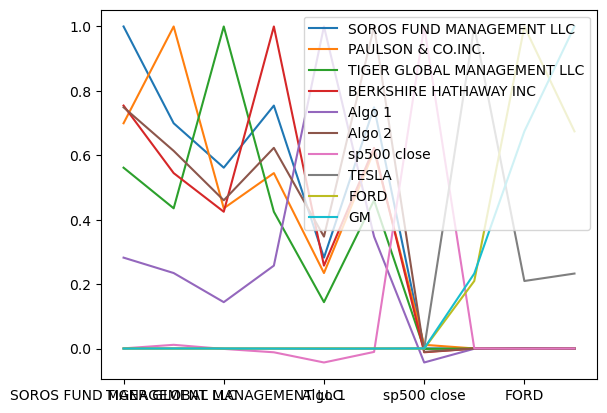

In [451]:
# plot the correlation
correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [266]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [447]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (noahs_ark.mean() *252) / (noahs_ark_std * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.225969
PAULSON & CO.INC.             -0.288789
TIGER GLOBAL MANAGEMENT LLC   -0.073918
BERKSHIRE HATHAWAY INC         0.387130
Algo 1                         0.875980
Algo 2                         0.431289
sp500 close                   -0.603463
TESLA                          0.197867
FORD                          -0.186448
GM                             0.097322
dtype: float64

<Axes: title={'center': 'Noahs Ark Sharpe Ratios'}>

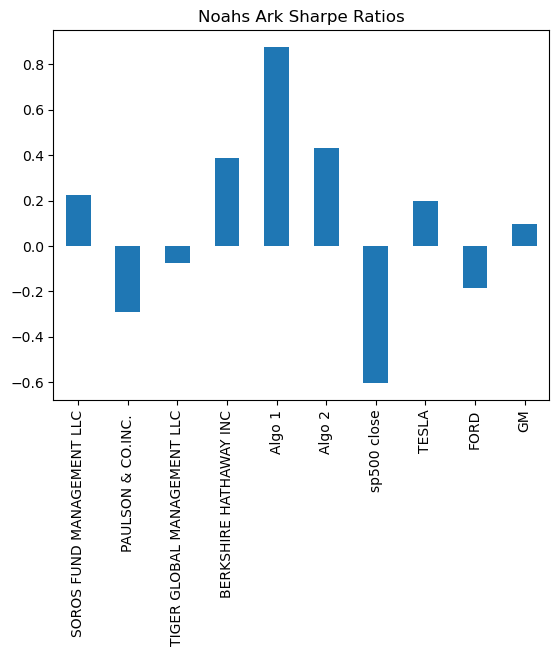

In [448]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind='bar', title='Noahs Ark Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [449]:
# My portfolio is not competitive with respect to the rest